In [1]:
pip install scanpy


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [161]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt


In [56]:
samples= pd.read_csv("mouse_VISp_2018-06-14_samples-columns.csv")

In [57]:
samples

,sample_name,sample_id,sample_type,organism,donor,sex,age_days,eye_condition,genotype,driver_lines,...,genes_detected_cpm_criterion,genes_detected_fpkm_criterion,tdt_cpm,gfp_cpm,class,subclass,cluster,confusion_score,cluster_correlation,core_intermediate_call
0,F1S4_160108_001_A01,527128530,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,10445,9222,248.86,248.86,GABAergic,Vip,Vip Arhgap36 Hmcn1,0.4385,0.837229,Intermediate
1,F1S4_160108_001_B01,527128536,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,11600,10370,289.61,289.61,GABAergic,Lamp5,Lamp5 Lsp1,0.1025,0.878743,Core
2,F1S4_160108_001_C01,527128542,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,11848,10734,281.06,281.06,GABAergic,Lamp5,Lamp5 Lsp1,0.0195,0.887084,Core
3,F1S4_160108_001_D01,527128548,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,9494,8561,390.02,390.02,GABAergic,Vip,Vip Crispld2 Htr2c,0.2734,0.843552,Core
4,F1S4_160108_001_E01,527128554,Cells,Mus musculus,225675,M,53,Normal,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,Slc32a1-IRES-Cre,...,10012,8791,253.92,253.92,GABAergic,Lamp5,Lamp5 Plch2 Dock5,0.7532,0.854994,Core
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15408,FYS4_171004_104_D01,645142573,Cells,Mus musculus,350650,M,51,Normal,Gng7-Cre_KH71/wt;Ai14(RCL-tdT)/wt,Gng7-Cre_KH71,...,7701,7023,217.83,217.83,GABAergic,Sst,Sst Hpse Sema3c,0.1064,0.854499,Core
15409,FYS4_171004_104_E01,645142584,Cells,Mus musculus,350650,M,51,Normal,Gng7-Cre_KH71/wt;Ai14(RCL-tdT)/wt,Gng7-Cre_KH71,...,9530,8931,293.50,293.50,No Class,No Class,Low Quality,NaN,NaN,Not Calculated
15410,FYS4_171004_104_F01,645142613,Cells,Mus musculus,350650,M,51,Normal,Gng7-Cre_KH71/wt;Ai14(RCL-tdT)/wt,Gng7-Cre_KH71,...,7888,7054,91.88,91.88,Glutamatergic,L5 PT,L5 PT VISp Chrna6,0.0095,0.822625,Core
15411,FYS4_171004_104_G01,645142648,Cells,Mus musculus,350650,M,51,Normal,Gng7-Cre_KH71/wt;Ai14(RCL-tdT)/wt,Gng7-Cre_KH71,...,8933,8146,127.77,127.77,GABAergic,Sst,Sst Calb2 Pdlim5,0.2852,0.856322,Core


In [58]:
df.head(5)

gene_symbol,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,...,n-R5s134,n-R5s136,n-R5s138,n-R5s139,n-R5s141,n-R5s142,n-R5s143,n-R5s144,n-R5s146,n-R5s149
F1S4_160108_001_A01,0,0,79,140,0,29,48,0,0,30,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_B01,0,0,121,175,1,23,2,0,181,196,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_C01,0,0,89,68,0,13,28,0,100,75,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_D01,0,0,115,0,0,0,46,0,35,17,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_E01,0,0,390,177,0,41,0,0,0,42,...,0,0,0,0,0,0,0,0,0,0


In [59]:
samples.loc[:,"class"]

0            GABAergic
1            GABAergic
2            GABAergic
3            GABAergic
4            GABAergic
             ...      
15408        GABAergic
15409         No Class
15410    Glutamatergic
15411        GABAergic
15412        GABAergic
Name: class, Length: 15413, dtype: object

In [7]:
df.columns

Index(['sample_name', 'sample_id', 'sample_type', 'organism', 'donor', 'sex',
       'age_days', 'eye_condition', 'genotype', 'driver_lines',
       'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion',
       'injection_label_direction', 'injection_primary', 'injection_secondary',
       'injection_tract', 'injection_material',
       'injection_exclusion_criterion', 'facs_date', 'facs_container',
       'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set',
       'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch',
       'total_reads', 'percent_exon_reads', 'percent_intron_reads',
       'percent_intergenic_reads', 'percent_rrna_reads',
       'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads',
       'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg',
       'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion',
       'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score',

In [110]:
samples["subclass"].value_counts()

subclass
L6 IT             1872
Sst               1741
Vip               1728
L4                1401
Pvalb             1337
Lamp5             1122
L2/3 IT            982
L6 CT              960
L5 IT              880
No Class           674
L5 PT              544
Astro              368
NP                 362
L6b                358
High Intronic      179
Batch Grouping     131
Sncg               125
Low Quality        120
Endo                94
Oligo               91
VLMC                67
Doublet             60
SMC                 55
Macrophage          51
Meis2               45
Peri                32
Serpinf1            27
CR                   7
Name: count, dtype: int64

In [17]:
genes= pd.read_csv("mouse_VISp_2018-06-14_genes-rows.csv")

In [9]:
genes.head()

,gene_symbol,gene_id,chromosome,gene_entrez_id,gene_name
0,0610005C13Rik,500717483,7,71661,RIKEN cDNA 0610005C13 gene
1,0610006L08Rik,500717917,7,76253,RIKEN cDNA 0610006L08 gene
2,0610007P14Rik,500730104,12,58520,RIKEN cDNA 0610007P14 gene
3,0610009B22Rik,500726890,11,66050,RIKEN cDNA 0610009B22 gene
4,0610009E02Rik,500702775,2,100125929,RIKEN cDNA 0610009E02 gene


In [10]:
genes


,gene_symbol,gene_id,chromosome,gene_entrez_id,gene_name
0,0610005C13Rik,500717483,7,71661,RIKEN cDNA 0610005C13 gene
1,0610006L08Rik,500717917,7,76253,RIKEN cDNA 0610006L08 gene
2,0610007P14Rik,500730104,12,58520,RIKEN cDNA 0610007P14 gene
3,0610009B22Rik,500726890,11,66050,RIKEN cDNA 0610009B22 gene
4,0610009E02Rik,500702775,2,100125929,RIKEN cDNA 0610009E02 gene
...,...,...,...,...,...
45763,n-R5s142,500721654,8,100861496,nuclear encoded rRNA 5S 142
45764,n-R5s143,500721655,8,100861497,nuclear encoded rRNA 5S 143
45765,n-R5s144,500721656,8,100861498,nuclear encoded rRNA 5S 144
45766,n-R5s146,500721658,8,100861500,nuclear encoded rRNA 5S 146


In [11]:
pip install mygene


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [12]:
import numpy as np
import warnings
import pandas as pd

from scipy import sparse
import pickle
import anndata
import scanpy as sc
sc.settings.verbosity = 2
import mygene
mg = mygene.MyGeneInfo()


In [45]:
# def sparseload(filename):
#     genes = []
#     sparseblocks = []
#     areas = []
#     cells = []
    
#     # Read the CSV file in chunks
#     for chunk in pd.read_csv(filename, chunksize=1000, index_col=0, na_filter=False):
#         if len(cells) == 0:
#             cells = chunk.columns
#             areas = [0] * chunk.columns.size
        
#         genes.extend(list(chunk.index))
#         sparseblock = sparse.csr_matrix(chunk.values.astype(float))
#         sparseblocks.append(sparseblock)
#         print('.', end='', flush=True)

#     print(' done')
#     counts = sparse.vstack(sparseblocks, format='csr')
#     return counts.T, np.array(genes), cells, np.array(areas)

# filename = 'mouse_VISp_2018-06-14_exon-matrix.csv'
# counts, genes, cells, areas = sparseload(filename)



In [14]:
exons= pd.read_csv('mouse_VISp_2018-06-14_exon-matrix.csv')

In [23]:
exons.T

,0,1,2,3,4,5,6,7,8,9,...,45758,45759,45760,45761,45762,45763,45764,45765,45766,45767
Unnamed: 0,71661,76253,58520,66050,100125929,66838,66839,100039060,71675,104457,...,100861490,100861491,100861492,100861493,100861495,100861496,100861497,100861498,100861500,100861503
F1S4_160108_001_A01,0,0,79,140,0,29,48,0,0,30,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_B01,0,0,121,175,1,23,2,0,181,196,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_C01,0,0,89,68,0,13,28,0,100,75,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_D01,0,0,115,0,0,0,46,0,35,17,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FYS4_171004_104_D01,0,0,99,160,0,42,0,0,29,0,...,0,0,0,0,0,0,0,0,0,0
FYS4_171004_104_E01,0,0,49,165,0,40,7,0,15,39,...,0,0,0,0,0,0,0,0,0,0
FYS4_171004_104_F01,0,0,123,245,0,0,9,0,0,57,...,0,0,0,0,0,0,0,0,0,0
FYS4_171004_104_G01,0,0,112,179,25,0,0,0,40,40,...,0,0,0,0,0,0,0,0,0,0


In [29]:
genes.index= genes[ "gene_symbol"]


In [30]:
genes

,gene_symbol,gene_id,chromosome,gene_entrez_id,gene_name
gene_symbol,,,,,
0610005C13Rik,0610005C13Rik,500717483,7,71661,RIKEN cDNA 0610005C13 gene
0610006L08Rik,0610006L08Rik,500717917,7,76253,RIKEN cDNA 0610006L08 gene
0610007P14Rik,0610007P14Rik,500730104,12,58520,RIKEN cDNA 0610007P14 gene
0610009B22Rik,0610009B22Rik,500726890,11,66050,RIKEN cDNA 0610009B22 gene
0610009E02Rik,0610009E02Rik,500702775,2,100125929,RIKEN cDNA 0610009E02 gene
...,...,...,...,...,...
n-R5s142,n-R5s142,500721654,8,100861496,nuclear encoded rRNA 5S 142
n-R5s143,n-R5s143,500721655,8,100861497,nuclear encoded rRNA 5S 143
n-R5s144,n-R5s144,500721656,8,100861498,nuclear encoded rRNA 5S 144


In [31]:
exons.index= genes.index

In [32]:
exons

,Unnamed: 0,F1S4_160108_001_A01,F1S4_160108_001_B01,F1S4_160108_001_C01,F1S4_160108_001_D01,F1S4_160108_001_E01,F1S4_160108_001_F01,F1S4_160108_001_G01,F1S4_160108_001_H01,F1S4_160108_002_A01,...,FYS4_171004_103_G01,FYS4_171004_103_H01,FYS4_171004_104_A01,FYS4_171004_104_B01,FYS4_171004_104_C01,FYS4_171004_104_D01,FYS4_171004_104_E01,FYS4_171004_104_F01,FYS4_171004_104_G01,FYS4_171004_104_H01
gene_symbol,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,71661,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610006L08Rik,76253,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,58520,79,121,89,115,390,61,72,161,118,...,263,45,88,81,187,99,49,123,112,37
0610009B22Rik,66050,140,175,68,0,177,110,149,60,61,...,136,82,74,104,51,160,165,245,179,91
0610009E02Rik,100125929,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n-R5s142,100861496,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n-R5s143,100861497,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n-R5s144,100861498,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df= exons.copy()

In [40]:
df.columns

Index(['Unnamed: 0', 'F1S4_160108_001_A01', 'F1S4_160108_001_B01',
       'F1S4_160108_001_C01', 'F1S4_160108_001_D01', 'F1S4_160108_001_E01',
       'F1S4_160108_001_F01', 'F1S4_160108_001_G01', 'F1S4_160108_001_H01',
       'F1S4_160108_002_A01',
       ...
       'FYS4_171004_103_G01', 'FYS4_171004_103_H01', 'FYS4_171004_104_A01',
       'FYS4_171004_104_B01', 'FYS4_171004_104_C01', 'FYS4_171004_104_D01',
       'FYS4_171004_104_E01', 'FYS4_171004_104_F01', 'FYS4_171004_104_G01',
       'FYS4_171004_104_H01'],
      dtype='object', length=15414)

In [46]:
df=df.drop("Unnamed: 0", axis=1)

In [51]:
df= df.T

In [149]:
df

gene_symbol,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,...,n-R5s134,n-R5s136,n-R5s138,n-R5s139,n-R5s141,n-R5s142,n-R5s143,n-R5s144,n-R5s146,n-R5s149
F1S4_160108_001_A01,0,0,79,140,0,29,48,0,0,30,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_B01,0,0,121,175,1,23,2,0,181,196,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_C01,0,0,89,68,0,13,28,0,100,75,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_D01,0,0,115,0,0,0,46,0,35,17,...,0,0,0,0,0,0,0,0,0,0
F1S4_160108_001_E01,0,0,390,177,0,41,0,0,0,42,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FYS4_171004_104_D01,0,0,99,160,0,42,0,0,29,0,...,0,0,0,0,0,0,0,0,0,0
FYS4_171004_104_E01,0,0,49,165,0,40,7,0,15,39,...,0,0,0,0,0,0,0,0,0,0
FYS4_171004_104_F01,0,0,123,245,0,0,9,0,0,57,...,0,0,0,0,0,0,0,0,0,0
FYS4_171004_104_G01,0,0,112,179,25,0,0,0,40,40,...,0,0,0,0,0,0,0,0,0,0


In [95]:
adata= sc.AnnData(df)

In [96]:
adata

AnnData object with n_obs × n_vars = 15413 × 45768

In [97]:
adata.obs

""
F1S4_160108_001_A01
F1S4_160108_001_B01
F1S4_160108_001_C01
F1S4_160108_001_D01
F1S4_160108_001_E01
...
FYS4_171004_104_D01
FYS4_171004_104_E01
FYS4_171004_104_F01
FYS4_171004_104_G01


In [98]:
adata.var

""
gene_symbol
0610005C13Rik
0610006L08Rik
0610007P14Rik
0610009B22Rik
0610009E02Rik
...
n-R5s142
n-R5s143
n-R5s144


In [99]:
classes= samples["class"].to_numpy()

In [100]:
classes

array(['GABAergic', 'GABAergic', 'GABAergic', ..., 'Glutamatergic',
       'GABAergic', 'GABAergic'], dtype=object)

In [102]:
adata.obs["cell_types"]=classes

In [111]:
adata.obs["sub_class"]=samples["subclass"].to_numpy()

In [112]:
adata.obs

,cell_types,sub_class
F1S4_160108_001_A01,GABAergic,Vip
F1S4_160108_001_B01,GABAergic,Lamp5
F1S4_160108_001_C01,GABAergic,Lamp5
F1S4_160108_001_D01,GABAergic,Vip
F1S4_160108_001_E01,GABAergic,Lamp5
...,...,...
FYS4_171004_104_D01,GABAergic,Sst
FYS4_171004_104_E01,No Class,No Class
FYS4_171004_104_F01,Glutamatergic,L5 PT
FYS4_171004_104_G01,GABAergic,Sst


In [114]:
adata.obs.value_counts()

cell_types     sub_class     
Glutamatergic  L6 IT             1872
GABAergic      Sst               1741
               Vip               1728
Glutamatergic  L4                1401
GABAergic      Pvalb             1337
               Lamp5             1122
Glutamatergic  L2/3 IT            982
               L6 CT              960
               L5 IT              880
No Class       No Class           674
Glutamatergic  L5 PT              544
Non-Neuronal   Astro              368
Glutamatergic  NP                 362
               L6b                358
Low Quality    High Intronic      179
               Batch Grouping     131
GABAergic      Sncg               125
Low Quality    Low Quality        120
Endothelial    Endo                94
Non-Neuronal   Oligo               91
               VLMC                67
Low Quality    Doublet             60
Endothelial    SMC                 55
Non-Neuronal   Macrophage          51
GABAergic      Meis2               45
Endothelial    Peri 

In [159]:
df.isna().sum()

gene_symbol
0610005C13Rik    0
0610006L08Rik    0
0610007P14Rik    0
0610009B22Rik    0
0610009E02Rik    0
                ..
n-R5s142         0
n-R5s143         0
n-R5s144         0
n-R5s146         0
n-R5s149         0
Length: 45768, dtype: int64

# Quality Control

normalizing counts per cell
    finished (0:01:01)


C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:63

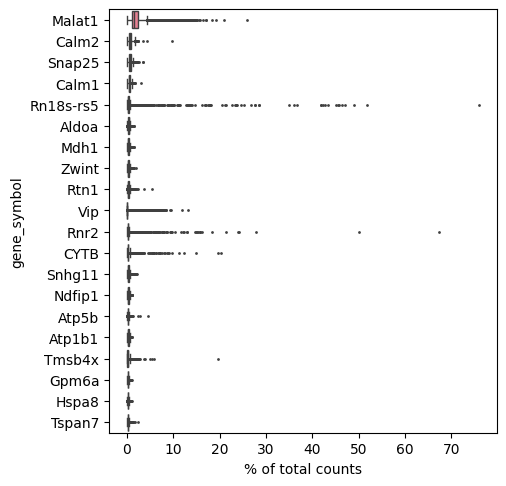

In [160]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [162]:
adata_n= adata.copy()
sc.pp.calculate_qc_metrics(adata_n, percent_top=None, log1p=False, inplace=True)

In [163]:
adata_n

AnnData object with n_obs × n_vars = 15413 × 45768
    obs: 'cell_types', 'sub_class', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [165]:
adata_n.var

,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
gene_symbol,,,,
0610005C13Rik,355,0.345358,97.696749,5323
0610006L08Rik,21,0.063323,99.863751,976
0610007P14Rik,14068,151.952573,8.726400,2342045
0610009B22Rik,13690,130.749043,11.178875,2015235
0610009E02Rik,1572,0.782911,89.800817,12067
...,...,...,...,...
n-R5s142,0,0.000000,100.000000,0
n-R5s143,0,0.000000,100.000000,0
n-R5s144,0,0.000000,100.000000,0


In [166]:
adata_n.obs

,cell_types,sub_class,n_genes_by_counts,total_counts
F1S4_160108_001_A01,GABAergic,Vip,9030,1730719
F1S4_160108_001_B01,GABAergic,Lamp5,10209,1909620
F1S4_160108_001_C01,GABAergic,Lamp5,10582,1984957
F1S4_160108_001_D01,GABAergic,Vip,8483,2291553
F1S4_160108_001_E01,GABAergic,Lamp5,8697,1757463
...,...,...,...,...
FYS4_171004_104_D01,GABAergic,Sst,6927,998736
FYS4_171004_104_E01,No Class,No Class,8832,1109888
FYS4_171004_104_F01,Glutamatergic,L5 PT,6937,1002767
FYS4_171004_104_G01,GABAergic,Sst,8028,1025818


In [174]:
adata_n.var_names.str.startswith("MT")
for x in adata_n.var_names.str.startswith("MT"):
    if x==True:
        print("true")

C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\91982\A

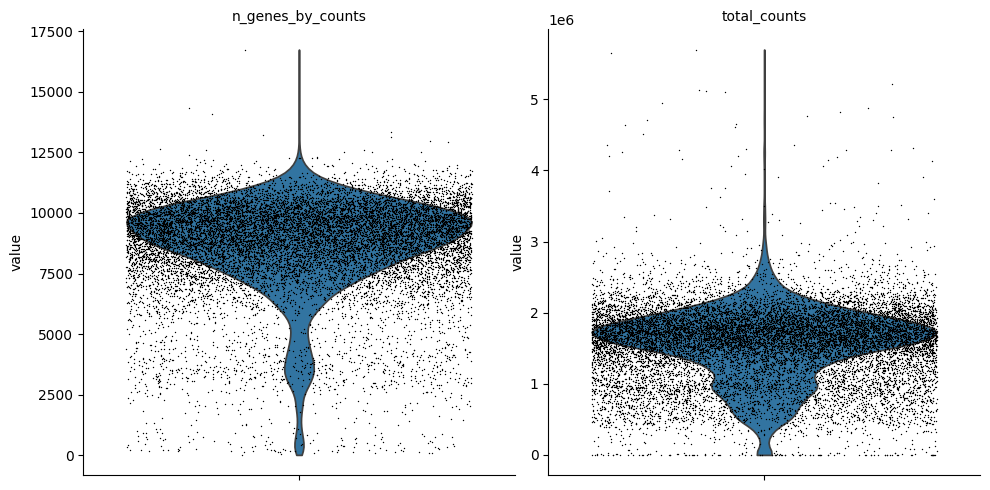

In [175]:
sc.pl.violin(adata_n, ['n_genes_by_counts',  'total_counts'], jitter=0.4, multi_panel=True)

# Spatial Data analysis

In [178]:
spatial= pd.read_csv("mouse_visual_cortex_STARmap.csv")

In [179]:
spatial

,Unnamed: 0,x_pixel,y_pixel,layer_type,cell_type,1110008F13Rik,1110008P14Rik,1700019D03Rik,1700086L19Rik,2810468N07Rik,...,Zcchc12,Zdhhc24,Zfand6,Zfp57,Zfp637,Zfp975,Zmat4,Zmym1,Znhit3,Znrd1
0,2,49.771247,4980.777664,L6,eL6-2,1,2,0,0,0,...,0,0,1,1,2,0,0,1,0,0
1,3,53.473114,8729.177425,L4,eL4,0,0,0,1,1,...,0,2,0,0,3,1,1,0,0,0
2,4,46.315493,11547.566359,L2/3,eL2/3,1,0,0,2,0,...,1,2,0,0,1,0,0,0,0,0
3,5,37.612811,3280.980264,I_CC,eL6-2,0,0,0,0,0,...,0,0,0,1,3,0,0,1,0,0
4,6,45.350312,7582.793601,L5,eL5,0,2,0,1,0,...,0,0,0,0,3,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,1204,6400.348920,3586.132257,L6,eL6-2,1,0,1,0,1,...,1,0,1,1,1,0,0,0,0,0
1203,1205,6404.411871,4005.014202,L6,eL6-2,1,0,0,0,0,...,0,0,0,0,6,0,0,0,0,1
1204,1206,6404.294179,9495.290017,L4,eL4,0,2,0,0,0,...,0,0,0,0,2,0,1,0,0,0
1205,1207,6418.719694,13653.531752,L1,Smc,0,0,2,0,0,...,0,0,1,0,1,0,0,1,0,0


In [113]:
spatial["cell_type"].value_counts()

cell_type
eL4      189
eL2/3    176
eL6-2    156
Oligo    154
Astro    131
Endo      86
eL6-1     80
eL5       69
Micro     52
PVALB     31
Reln      27
SST       23
VIP       13
HPC       10
Smc       10
Name: count, dtype: int64

In [115]:
spatial["layer_type"].value_counts()

layer_type
L2/3    273
L4      250
L6      213
I_CC    179
L5      171
HPC      73
L1       48
Name: count, dtype: int64

In [182]:
metadata= spatial.iloc[:,:5]

In [184]:
metadata.columns

Index(['Unnamed: 0', 'x_pixel', 'y_pixel', 'layer_type', 'cell_type'], dtype='object')

In [185]:
metadata= metadata.drop("Unnamed: 0", axis=1)

In [186]:
metadata

,x_pixel,y_pixel,layer_type,cell_type
0,49.771247,4980.777664,L6,eL6-2
1,53.473114,8729.177425,L4,eL4
2,46.315493,11547.566359,L2/3,eL2/3
3,37.612811,3280.980264,I_CC,eL6-2
4,45.350312,7582.793601,L5,eL5
...,...,...,...,...
1202,6400.348920,3586.132257,L6,eL6-2
1203,6404.411871,4005.014202,L6,eL6-2
1204,6404.294179,9495.290017,L4,eL4
1205,6418.719694,13653.531752,L1,Smc


In [187]:
spatial_df= spatial.iloc[:, 5:]

In [188]:
spatial_df

,1110008F13Rik,1110008P14Rik,1700019D03Rik,1700086L19Rik,2810468N07Rik,2900055J20Rik,2900092D14Rik,3110035E14Rik,3632451O06Rik,6330403K07Rik,...,Zcchc12,Zdhhc24,Zfand6,Zfp57,Zfp637,Zfp975,Zmat4,Zmym1,Znhit3,Znrd1
0,1,2,0,0,0,0,0,0,0,0,...,0,0,1,1,2,0,0,1,0,0
1,0,0,0,1,1,2,0,1,1,0,...,0,2,0,0,3,1,1,0,0,0
2,1,0,0,2,0,0,0,0,0,0,...,1,2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,3,0,0,1,0,0
4,0,2,0,1,0,0,0,1,0,0,...,0,0,0,0,3,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,1,0,1,0,1,1,0,4,0,0,...,1,0,1,1,1,0,0,0,0,0
1203,1,0,0,0,0,0,0,4,0,0,...,0,0,0,0,6,0,0,0,0,1
1204,0,2,0,0,0,1,0,3,0,0,...,0,0,0,0,2,0,1,0,0,0
1205,0,0,2,0,0,2,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [189]:
spatial_adata= sc.AnnData(spatial_df)

C:\Users\91982\AppData\Roaming\Python\Python311\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [190]:
spatial_adata

AnnData object with n_obs × n_vars = 1207 × 1020

In [192]:
spatial_adata.obs= metadata

In [193]:
spatial_adata.obs

,x_pixel,y_pixel,layer_type,cell_type
0,49.771247,4980.777664,L6,eL6-2
1,53.473114,8729.177425,L4,eL4
2,46.315493,11547.566359,L2/3,eL2/3
3,37.612811,3280.980264,I_CC,eL6-2
4,45.350312,7582.793601,L5,eL5
...,...,...,...,...
1202,6400.348920,3586.132257,L6,eL6-2
1203,6404.411871,4005.014202,L6,eL6-2
1204,6404.294179,9495.290017,L4,eL4
1205,6418.719694,13653.531752,L1,Smc


In [197]:
spatial_adata.obsm["spatial"]=metadata.loc[:,["x_pixel","y_pixel"]].values

In [198]:
spatial_adata.var

""
1110008F13Rik
1110008P14Rik
1700019D03Rik
1700086L19Rik
2810468N07Rik
...
Zfp975
Zmat4
Zmym1
Znhit3


In [200]:
spatial_adata.obsm

AxisArrays with keys: spatial

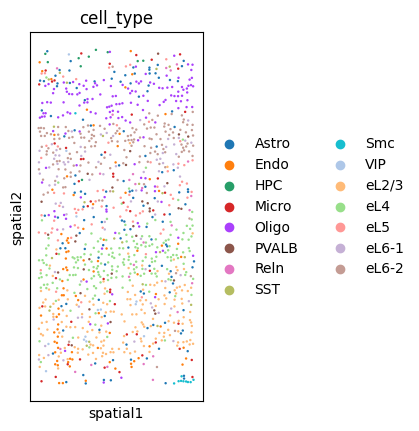

In [201]:
sc.pl.spatial(spatial_adata,color="cell_type",spot_size=100)